# Introduction to Monodromy Matrix
## Given:
You are at a perturbation on $L_1$ at $\xi = 0.01$ and $\eta=0$ for the Earth-Moon system

## Find:
a) Eigenvalues and eigenvectors matrix asscociated with the orbit, are they real or complex?

b) Find the Lyaponav orbit (5 orbits)

i) Eigenvalues for all of the monodromy matrix. What is the x_0 step size? Why? Plot all orbits.

ii) Plot $\dot{y}_0$ as a function of $\dot{x}_0$. Is teh curve smooth with continuous derivatives? Could you predict with more effieciency?

iii) Plot period and IC as a funtion of $x_0$

In [21]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from datetime import timedelta

In [22]:
system = "Earth-Moon"

gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)

xi_0    = 0.01
eta_0   = 0
zeta_0  = 0 

U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L1, 0, 0, SS3.loc[system,'miu']) 

beta_1  = 2 - (U_xx + U_yy)/2
beta_2  = np.sqrt(-U_xx*U_yy)
s       = np.sqrt(beta_1 + np.sqrt(beta_1**2 + beta_2**2))
beta_3  = (s**2 + U_xx)/2/s

xi_dot_0    = eta_0*s/beta_3
eta_dot_0   = -beta_3*xi_0*s
zeta_dot_0  = 0

t_span = [0, np.pi/2]
IC = np.append([L1+xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 

target = {'x_dot_f': 0, 'y_f':0}
changeable = ('y_dot_0')

IC_per, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, attempts=10)

t_span = [0, 2*tf_per]

### Part a)

In [23]:
traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC_per, method='RK45',
                      rtol=10**-12, atol=10**-16)

mono = traj_perd.y[6:,-1].reshape(6,6)
eig_val, eig_vec = np.linalg.eig(mono)

print('The eigenvalues are:\n', pd.Series(eig_val))
print('\n')
print('The eigenvectors are:\n', pd.DataFrame(eig_vec))


The eigenvalues are:
 0    2561.142029+0.000000j
1     0.0003900+0.0000000j
2     1.0000000+0.0000010j
3     1.0000000-0.0000010j
4     0.9898590+0.1420560j
5     0.9898590-0.1420560j
dtype: complex128


The eigenvectors are:
                             0                           1  \
0  2.749579e-01+0.000000e+00j  2.749579e-01+0.000000e+00j   
1 -1.589865e-01+0.000000e+00j  1.589865e-01+0.000000e+00j   
2 -3.663699e-25+0.000000e+00j  2.403184e-18+0.000000e+00j   
3  8.491245e-01+0.000000e+00j -8.491245e-01+0.000000e+00j   
4 -4.220297e-01+0.000000e+00j -4.220297e-01+0.000000e+00j   
5 -8.892851e-24+0.000000e+00j  5.833220e-17+0.000000e+00j   

                            2                           3  \
0 -8.655974e-12+2.668013e-06j -8.655974e-12-2.668013e-06j   
1  9.067228e-01+0.000000e+00j  9.067228e-01-0.000000e+00j   
2 -7.353374e-17+5.576336e-23j -7.353374e-17-5.576336e-23j   
3  4.217272e-01-4.287691e-17j  4.217272e-01+4.287691e-17j   
4  6.877118e-11-1.958551e-05j  6.877118e

### Part b)

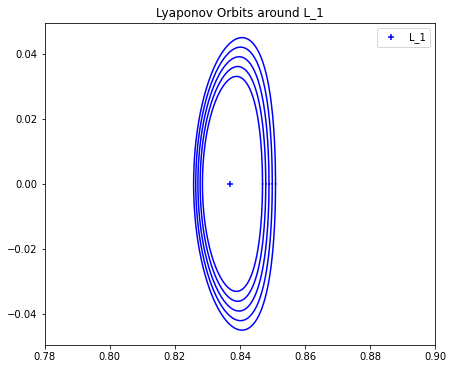

In [24]:
x0_step = 0.001
x0_init = xi_0 + L1
n = 5
tf_per = 1.35
y_dot_0_vec = np.zeros((5,))
x_0_vec = np.zeros((n,))
J_c_vec = np.zeros((n,))
Per_vec = np.zeros((n,))

fig, axs = plt.subplots(figsize= (7,7))

for i, x_0 in enumerate(np.arange(x0_init, n*x0_step+x0_init-x0_step, x0_step)):
    IC = np.append(x_0, IC[1:])
    t_span = [0, tf_per] 
    
    # Find the new orbit
    IC, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, attempts=5)
    
    t_span = [0, 2*tf_per] 
    # Plot the new orbit
    traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45',
                      rtol=10**-12, atol=10**-16)

    IC = IC[:6]
    
    # Log some values
    y_dot_0_vec[i] = IC[4]
    x_0_vec[i] = IC[0]
    Per_vec[i] = t_span[-1]
    J_c_vec[i] = pn.Jacobi_const(*IC[:3], v=np.linalg.norm(IC[3:6]), miu=SS3.loc[system,'miu'])

    
    axs.plot(traj_perd.y[0,:], traj_perd.y[1,:], color = 'blue')

axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.legend()
axs.set_xlim([.78, .9])
axs.set_aspect('equal', 'box')
axs.set_title('Lyaponov Orbits around L_1')
axs.legend()

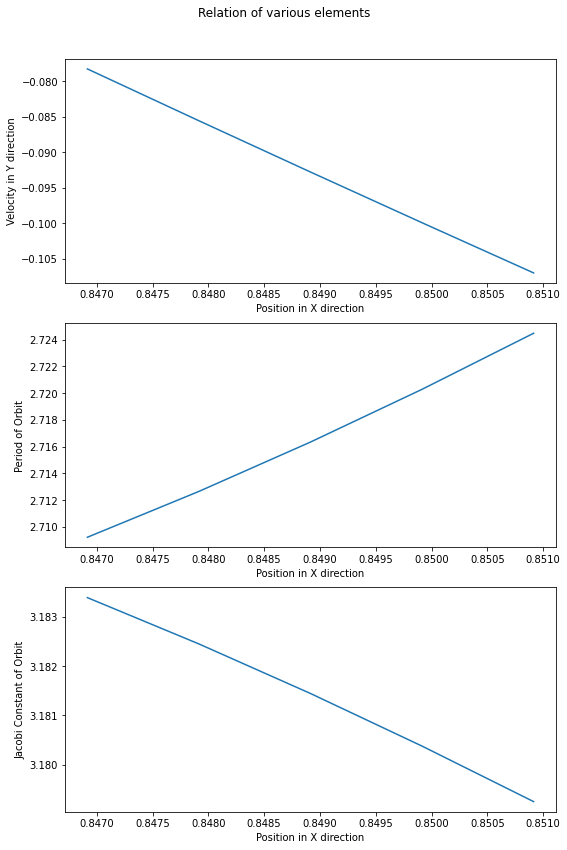

In [25]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize= (8,12))
ax = axs.ravel()

ax[0].plot(x_0_vec, y_dot_0_vec)
ax[0].set_xlabel('Position in X direction')
ax[0].set_ylabel('Velocity in Y direction')


ax[1].plot(x_0_vec, Per_vec)
ax[1].set_xlabel('Position in X direction')
ax[1].set_ylabel('Period of Orbit')

ax[2].plot(x_0_vec, J_c_vec)
ax[2].set_xlabel('Position in X direction')
ax[2].set_ylabel('Jacobi Constant of Orbit')

fig.suptitle('Relation of various elements')
fig.tight_layout()
fig.subplots_adjust(top=0.92)
